<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/example%20CNN%20timeseries%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate Dataset

Libraries imported successfully!
TensorFlow version: 2.19.0
Time series data shape: (3000, 100, 1)
Labels shape: (3000,)
Classes: ['Sine Wave', 'Cosine Wave', 'Linear Trend']


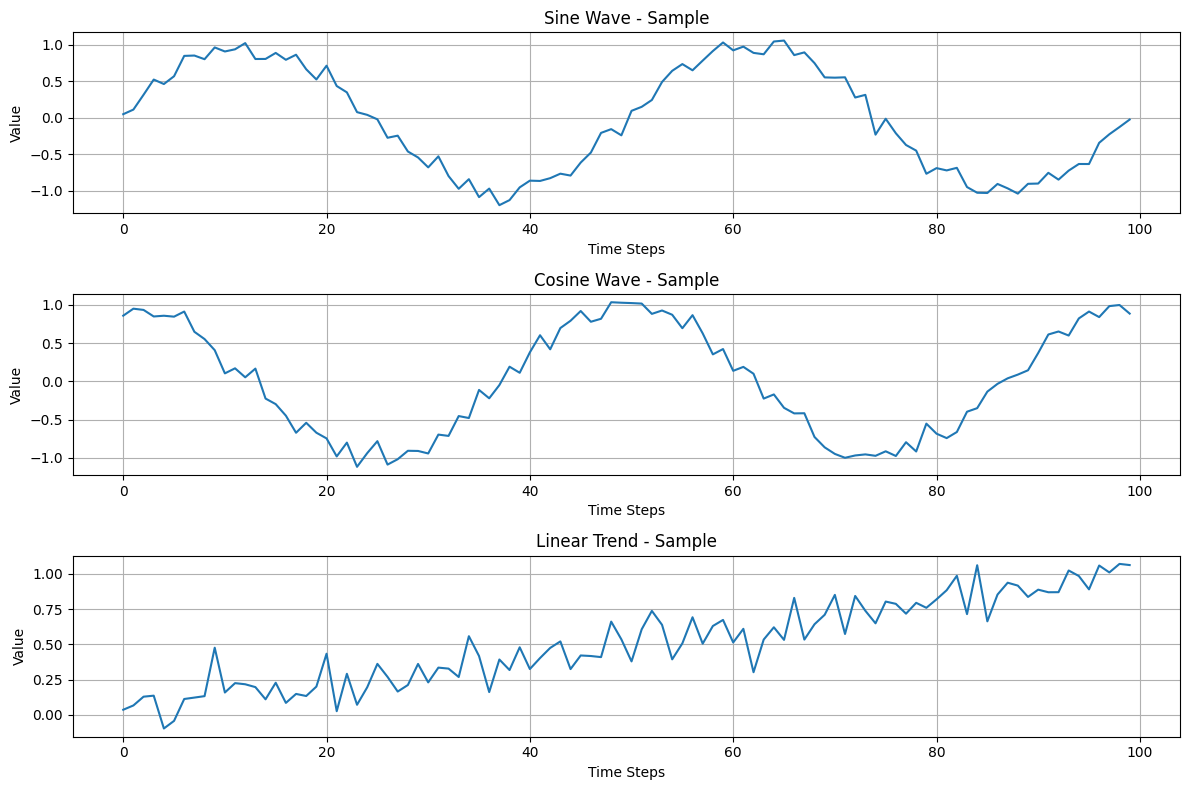

In [5]:
# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

# Cell 2: Create synthetic time series dataset
"""
Create a synthetic time series dataset with 3 classes
Each sample has 100 time steps and 1 feature
"""
def create_timeseries_data(n_samples=1000, n_timesteps=100, n_features=1, n_classes=3):
    """
    Create synthetic time series data for classification
    """
    X = []
    y = []

    for i in range(n_samples):
        class_id = i % n_classes
        sequence = np.zeros((n_timesteps, n_features))

        if class_id == 0:  # Sine wave
            t = np.linspace(0, 4*np.pi, n_timesteps)
            sequence[:, 0] = np.sin(t) + 0.1*np.random.randn(n_timesteps)
        elif class_id == 1:  # Cosine wave
            t = np.linspace(0, 4*np.pi, n_timesteps)
            sequence[:, 0] = np.cos(t) + 0.1*np.random.randn(n_timesteps)
        else:  # Linear trend
            sequence[:, 0] = np.linspace(0, 1, n_timesteps) + 0.1*np.random.randn(n_timesteps)

        X.append(sequence)
        y.append(class_id)

    return np.array(X), np.array(y)

# Generate dataset
X, y = create_timeseries_data(n_samples=3000, n_timesteps=100, n_features=1, n_classes=3)
class_names = ['Sine Wave', 'Cosine Wave', 'Linear Trend']

print(f"Time series data shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Classes: {class_names}")

# Cell 3: Visualize sample time series
"""
Visualize sample time series from each class
"""
plt.figure(figsize=(12, 8))
for i in range(3):  # Show one sample from each class
    class_samples = X[y == i]
    plt.subplot(3, 1, i + 1)
    plt.plot(class_samples[0].flatten())
    plt.title(f'{class_names[i]} - Sample')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.grid(True)
plt.tight_layout()
plt.show()

# CNN model for timeseries

Training set: (2400, 100, 1), (2400, 3)
Test set: (600, 100, 1), (600, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 96, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 48, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 46, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 21, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,707 (147.29 KB)

 Trainable params: 37,707 (147.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5190 - loss: 1.0418 - val_accuracy: 1.0000 - val_loss: 0.4867
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9368 - loss: 0.3442 - val_accuracy: 1.0000 - val_loss: 0.0272
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9952 - loss: 0.0505 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9986 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9991 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 4.6912e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9989 - loss: 0.0072 - val_accuracy: 1.0000 - val_loss: 2.6651e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 1.6069e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy

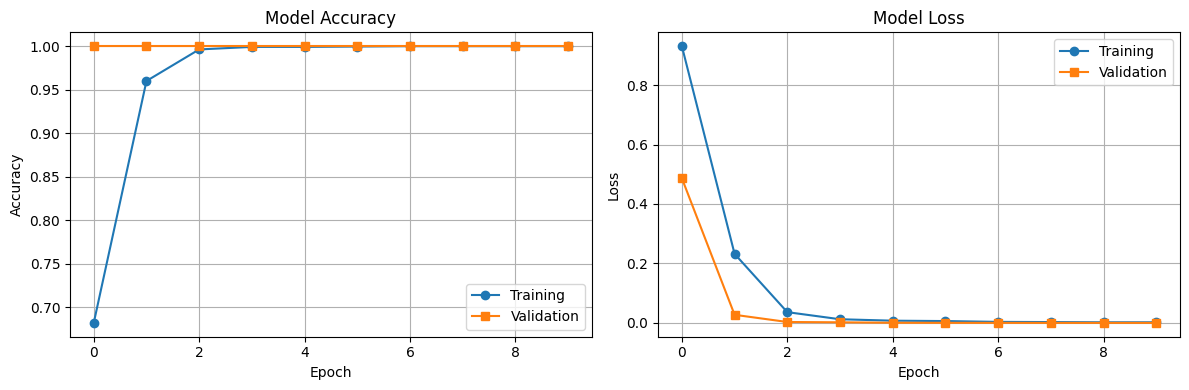

In [6]:


# Cell 4: Preprocess the data
"""
Preprocess time series
1. Normalize features
2. Split into train/test sets
3. Convert labels to categorical
"""
# Normalize the data
scaler = StandardScaler()
X_normalized = X.copy()
for i in range(X.shape[0]):
    X_normalized[i] = scaler.fit_transform(X[i])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)

# Convert labels to categorical
y_train_categorical = keras.utils.to_categorical(y_train, 3)
y_test_categorical = keras.utils.to_categorical(y_test, 3)

print(f"Training set: {X_train.shape}, {y_train_categorical.shape}")
print(f"Test set: {X_test.shape}, {y_test_categorical.shape}")

# Cell 5: Build CNN model for time series
"""
CNN architecture for time series:
- 1D convolutions instead of 2D
- Input shape: (timesteps, features)
"""
model = keras.Sequential([
    # First Convolutional Block
    layers.Conv1D(32, 5, activation='relu', input_shape=(100, 1)),
    layers.MaxPooling1D(2),
    layers.Dropout(0.2),

    # Second Convolutional Block
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Dropout(0.2),

    # Third Convolutional Block
    layers.Conv1D(128, 3, activation='relu'),
    layers.Dropout(0.2),

    # Global Average Pooling and Dense layers
    layers.GlobalAveragePooling1D(),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 3 classes
])

model.summary()

# Cell 6: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Cell 7: Train the model
history = model.fit(
    X_train, y_train_categorical,
    batch_size=64,
    epochs=10,  # Reduced epochs for speed
    validation_data=(X_test, y_test_categorical),
    verbose=1
)

# Cell 8: Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['accuracy'], label='Training', marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validation', marker='s')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['loss'], label='Training', marker='o')
    ax2.plot(history.history['val_loss'], label='Validation', marker='s')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)



# Evalure model

Test Accuracy: 1.0000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:
              precision    recall  f1-score   support

   Sine Wave       1.00      1.00      1.00       200
 Cosine Wave       1.00      1.00      1.00       200
Linear Trend       1.00      1.00      1.00       200

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



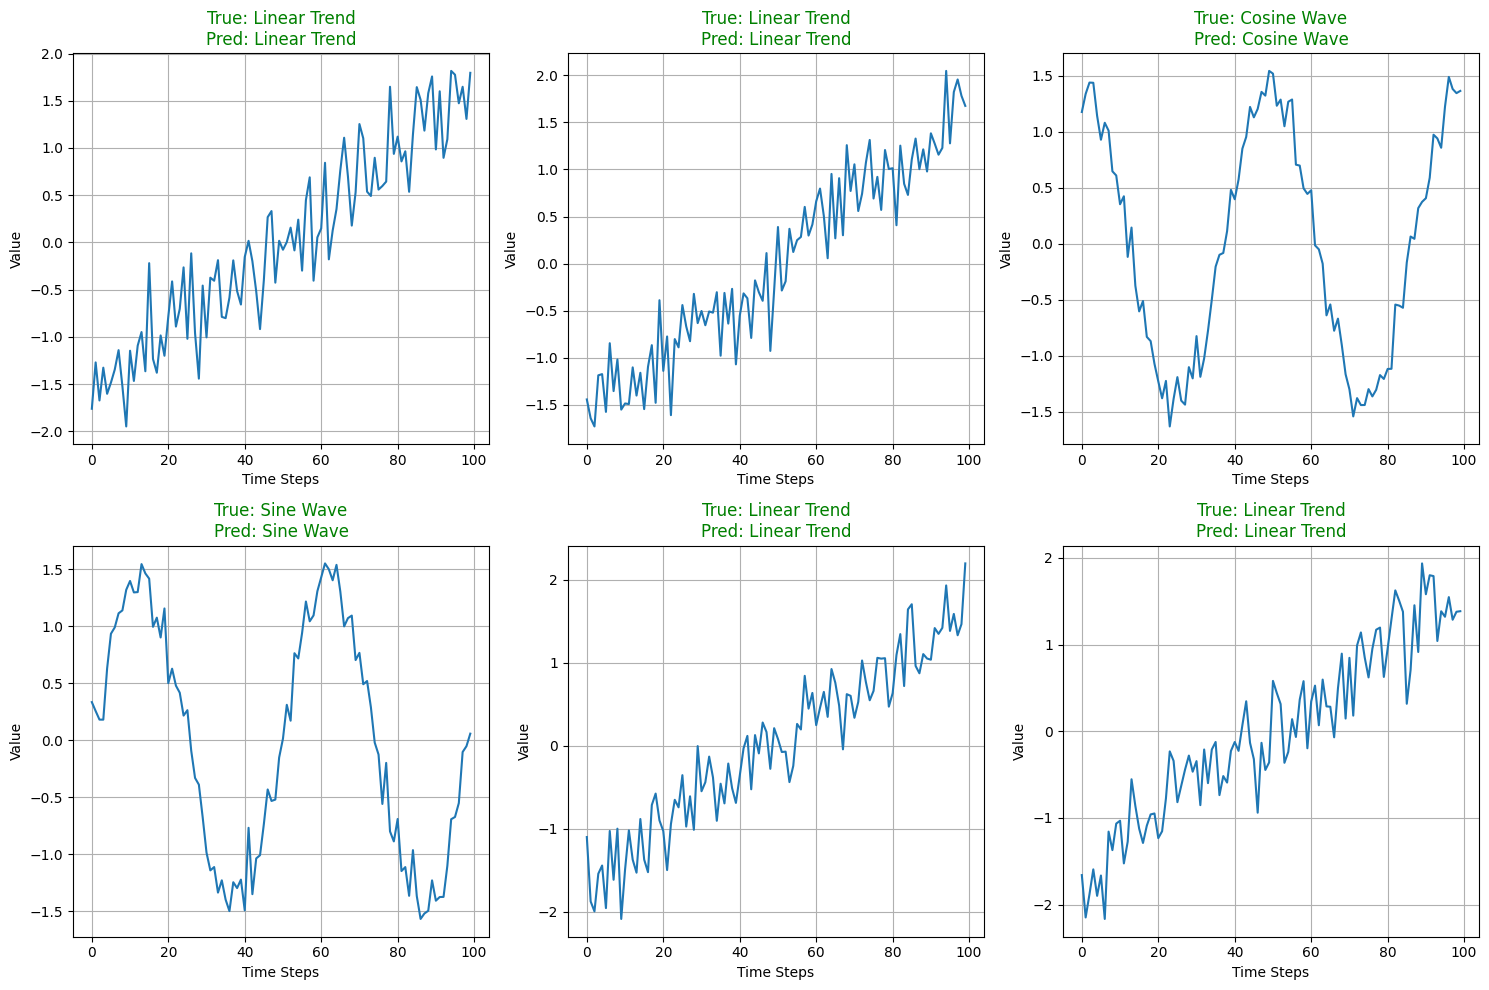

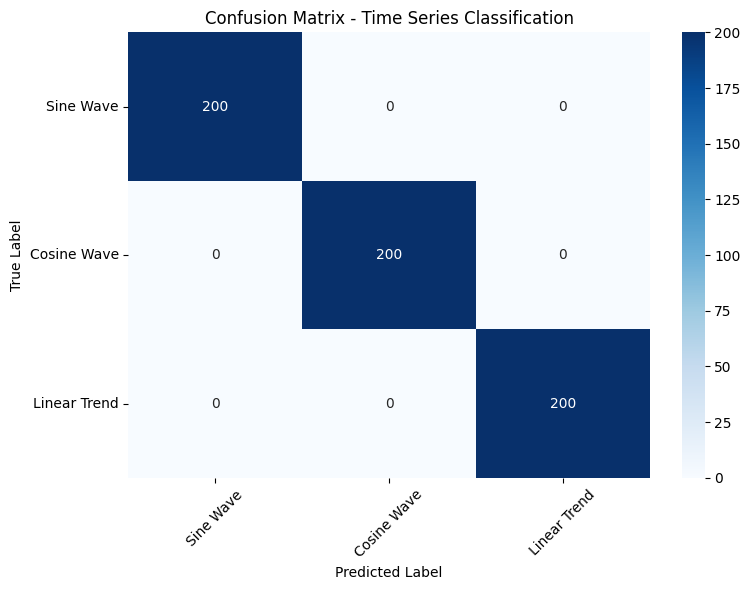

Error in feature map visualization: The layer sequential has never been called and thus has no defined input.


In [10]:
# Cell 9: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Cell 10: Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Cell 11: Visualize predictions
def plot_predictions(X, y_true, y_pred, class_names, n_samples=6):
    """
    Plot time series with true and predicted labels
    """
    plt.figure(figsize=(15, 10))
    for i in range(min(n_samples, len(X))):
        plt.subplot(2, 3, i + 1)
        plt.plot(X[i].flatten())
        true_name = class_names[y_true[i]]
        pred_name = class_names[y_pred[i]]

        color = 'green' if y_true[i] == y_pred[i] else 'red'
        plt.title(f'True: {true_name}\nPred: {pred_name}', color=color)
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(X_test, true_classes, predicted_classes, class_names)

# Cell 12: Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Time Series Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Cell 13: Safe Feature Map Visualization (WORKING VERSION)
def visualize_feature_maps_1d(model, sample_sequence):
    """
    Safe visualization of feature maps from 1D convolutional layers
    """
    try:
        # Create a new model that outputs intermediate layers
        conv_layers = []
        layer_names = []

        for i, layer in enumerate(model.layers):
            if isinstance(layer, layers.Conv1D):
                conv_layers.append(i)
                layer_names.append(layer.name)

        # If there are Conv1D layers, create intermediate model
        if conv_layers:
            layer_outputs = [model.layers[i].output for i in conv_layers]
            intermediate_model = keras.Model(inputs=model.input, outputs=layer_outputs)

            # Get feature maps
            sample_input = np.expand_dims(sample_sequence, axis=0)
            features_list = intermediate_model.predict(sample_input)

            # Plot feature maps for each conv layer
            for idx, (features, name) in enumerate(zip(features_list, layer_names)):
                n_filters = features.shape[-1]
                n_to_show = min(4, n_filters)  # Show up to 4 feature maps

                plt.figure(figsize=(12, 2 * n_to_show))
                for i in range(n_to_show):
                    plt.subplot(n_to_show, 1, i + 1)
                    plt.plot(features[0, :, i])
                    plt.title(f'{name} - Feature Map {i+1}')
                    plt.grid(True)
                plt.suptitle(f'Feature Maps from {name}')
                plt.tight_layout()
                plt.show()
        else:
            print("No Conv1D layers found in the model.")
    except Exception as e:
        print(f"Error in feature map visualization: {e}")

# Visualize feature maps for a sample
sample_idx = 1
visualize_feature_maps_1d(model, X_test[sample_idx])

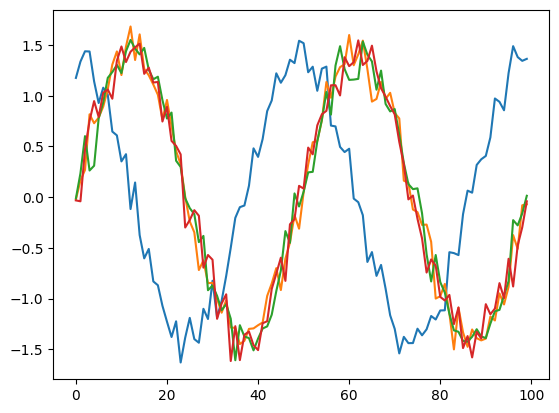

In [26]:
plt.plot(X_test[2])
plt.plot(X_test[6])
plt.plot(X_test[10])
plt.plot(X_test[14])

In [8]:
print(f"\nModel Performance:")
print(f"Accuracy: {test_accuracy:.3f}")
print(f"Parameters: {model.count_params():,}")


Model Performance:
Accuracy: 1.000
Parameters: 37,707


# ECG example

ECG-like data shape: (1500, 180, 1)
Classes: ['Normal ECG', 'Irregular ECG', 'Slow ECG']


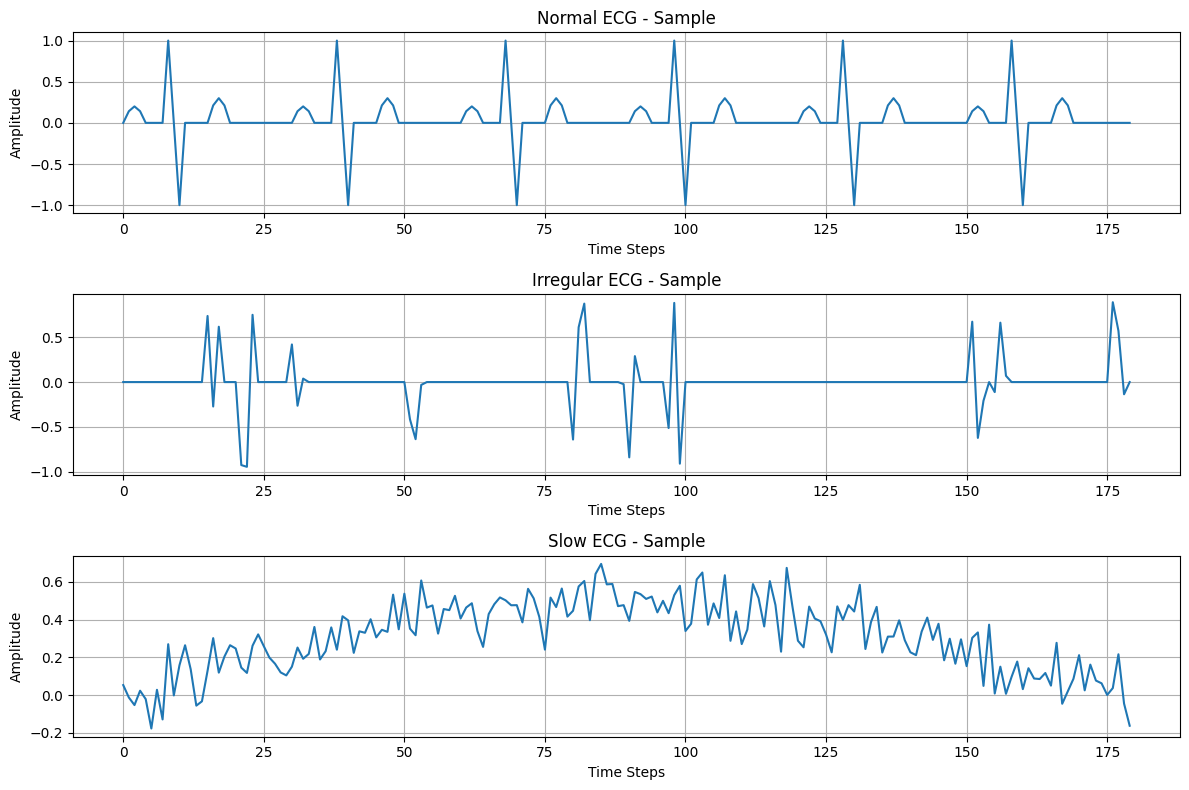

Epoch 1/8


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5444 - loss: 1.0503 - val_accuracy: 0.9867 - val_loss: 0.8573
Epoch 2/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9174 - loss: 0.7343 - val_accuracy: 1.0000 - val_loss: 0.3341
Epoch 3/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9657 - loss: 0.2699 - val_accuracy: 1.0000 - val_loss: 0.0575
Epoch 4/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9941 - loss: 0.0667 - val_accuracy: 1.0000 - val_loss: 0.0086
Epoch 5/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9983 - loss: 0.0211 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 6.0051e-04
Epoch 8/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 3.400


ECG Model Test Accuracy: 1.0000

CNN FOR TIME SERIES CLASSIFICATION - SUMMARY
1. CNNs can effectively classify time series by learning temporal patterns
2. 1D convolutions are used instead of 2D for sequential data
3. Key parameters: kernel size, stride, pooling
4. Works well for: ECG, EEG, stock prices, sensor data
5. Advantages: Automatic feature extraction, handles variable length
6. Disadvantages: Requires more data, less interpretable than traditional methods

Simple Model Accuracy: 1.000
ECG Model Accuracy: 1.000

Models saved!


In [9]:
def create_ecg_like_data(n_samples=1000, n_timesteps=180, n_classes=3):
    """
    Create ECG-like time series data with 3 classes
    """
    X = []
    y = []

    for i in range(n_samples):
        class_id = i % n_classes
        sequence = np.zeros(n_timesteps)

        # Create different ECG-like patterns for each class
        if class_id == 0:  # Normal
            # Simulate P-QRS-T waves
            for j in range(0, n_timesteps, 30):
                if j + 20 < n_timesteps:
                    # P wave
                    sequence[j:j+5] = np.sin(np.linspace(0, np.pi, 5)) * 0.2
                    # QRS complex
                    sequence[j+7:j+12] = np.sin(np.linspace(0, 2*np.pi, 5)) * 1.0
                    # T wave
                    sequence[j+15:j+20] = np.sin(np.linspace(0, np.pi, 5)) * 0.3

        elif class_id == 1:  # Abnormal 1 (irregular)
            # Random peaks
            peaks = np.random.choice(n_timesteps, size=10, replace=False)
            for peak in peaks:
                if peak + 3 < n_timesteps:
                    sequence[peak:peak+3] = np.random.random(3) * 2 - 1

        else:  # Abnormal 2 (slow)
            # Slow oscillations
            t = np.linspace(0, 2*np.pi, n_timesteps)
            sequence = 0.5 * np.sin(0.5 * t) + 0.1 * np.random.randn(n_timesteps)

        X.append(sequence.reshape(-1, 1))  # Reshape to (timesteps, features)
        y.append(class_id)

    return np.array(X), np.array(y)

# Create ECG-like dataset
X_ecg, y_ecg = create_ecg_like_data(n_samples=1500, n_timesteps=180, n_classes=3)
class_names_ecg = ['Normal ECG', 'Irregular ECG', 'Slow ECG']

print(f"ECG-like data shape: {X_ecg.shape}")
print(f"Classes: {class_names_ecg}")

# Visualize ECG samples
plt.figure(figsize=(12, 8))
for i in range(3):
    class_samples = X_ecg[y_ecg == i]
    plt.subplot(3, 1, i + 1)
    plt.plot(class_samples[0].flatten())
    plt.title(f'{class_names_ecg[i]} - Sample')
    plt.xlabel('Time Steps')
    plt.ylabel('Amplitude')
    plt.grid(True)
plt.tight_layout()
plt.show()

# Cell 16: Train CNN on ECG-like data
"""
Train a new CNN model on the ECG-like dataset
"""
# Split the ECG data
X_train_ecg, X_test_ecg, y_train_ecg, y_test_ecg = train_test_split(
    X_ecg, y_ecg, test_size=0.2, random_state=42, stratify=y_ecg
)

# Convert labels to categorical
y_train_ecg_cat = keras.utils.to_categorical(y_train_ecg, 3)
y_test_ecg_cat = keras.utils.to_categorical(y_test_ecg, 3)

# Build new model for ECG data
ecg_model = keras.Sequential([
    layers.Conv1D(16, 7, activation='relu', input_shape=(180, 1)),
    layers.MaxPooling1D(3),
    layers.Conv1D(32, 5, activation='relu'),
    layers.MaxPooling1D(3),
    layers.Conv1D(64, 3, activation='relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

ecg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ecg_history = ecg_model.fit(
    X_train_ecg, y_train_ecg_cat,
    batch_size=64,
    epochs=8,  # Fewer epochs for speed
    validation_data=(X_test_ecg, y_test_ecg_cat),
    verbose=1
)

# Evaluate ECG model
ecg_test_loss, ecg_test_accuracy = ecg_model.evaluate(X_test_ecg, y_test_ecg_cat, verbose=0)
print(f"\nECG Model Test Accuracy: {ecg_test_accuracy:.4f}")

# Cell 17: Summary
print("\n" + "="*50)
print("CNN FOR TIME SERIES CLASSIFICATION - SUMMARY")
print("="*50)
print("1. CNNs can effectively classify time series by learning temporal patterns")
print("2. 1D convolutions are used instead of 2D for sequential data")
print("3. Key parameters: kernel size, stride, pooling")
print("4. Works well for: ECG, EEG, stock prices, sensor data")
print("5. Advantages: Automatic feature extraction, handles variable length")
print("6. Disadvantages: Requires more data, less interpretable than traditional methods")

print(f"\nSimple Model Accuracy: {test_accuracy:.3f}")
print(f"ECG Model Accuracy: {ecg_test_accuracy:.3f}")

# Save models
model.save('timeseries_cnn_simple.h5')
ecg_model.save('timeseries_cnn_ecg.h5')
print("\nModels saved!")